In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## REI602M Machine Learning - Homework 8
### Due: *Thursday* 18.3.2021

**Objectives**: Neural networks, gradient descent, convolutional neural networks, Keras.

**Name**: Alexander Guðmundsson, **email: ** alg35@hi.is, **collaborators:** (if any)

Problem 1 on this week's assignment is taken from the CS231n machine learning course at Stanford University. Solutions to the problem are easily available on the web but I trust that you will not look them up and solve the problem on your own (feel free to collaborate though). This problem will take some time, but when you do complete it you will have acquired a solid understanding of the backpropagation algorithm for training neural networks. The second problem is more straightforward. Its solution depends on the Keras package though and you therefore have to install TensorFlow use Google's Colab.

Please provide your solutions by filling in the appropriate cells in this notebook, creating new cells as needed. Hand in your solution on Gradescope, taking care to locate the appropriate page numbers in the PDF document. Make sure that you are familiar with the course rules on collaboration (encouraged) and copying (very, very, bad).

### 1\. [Implementing a Neural network, 60 points]
In this problem you will implement a feedforward neural network with a single hidden layer and use it to classify images from the CIFAR-10 dataset. The hidden layer has weights $W_1$ and biases $b_1$, and the output layer has weights $W_2$ and biases $b_2$. The nodes in the hidden layer use ReLU activation, $g(z)=\max(0,z)$ and the output layer uses the vector valued softmax function,
$$
f_j(z) = \frac{e^{z_j}}{\sum_k e^{z_k}}
$$
where $z$ is a real valued vector. The softmax function is a generalization of the sigmoid function for multiple classes. It transforms the values in $z$ (called class scores) to values between zero and one that sum to one. The $f$ values can then be interpreted as class probabilities during prediction.

The objective to be minimized is regularized cross-entropy loss,
$$
L = \frac{1}{N}\sum_{i=1}^N L_i + \lambda (||W_1||_F^2 + ||W_2||_F^2)
$$
where $N$ is the number of training examples, and $L_i$ is the loss for element $i$,
$$
L_i = -\log \left( \frac{e^{z_{y_i}}}{\sum_j e^{z_j}} \right) = -z_{y_i} + \log{\sum_j e^{z_j}}
$$

Training uses *mini-batch gradient descent* where a single gradient update is based on multiple examples, instead of all the examples (batch gradient descent) or a single example (stochastic gradient descent).

*Comments*:

1) The lecture notes from CS231n on Softmax http://cs231n.github.io/linear-classify/#loss, feedforward neural networks http://cs231n.github.io/neural-networks-1/, backpropagation http://cs231n.github.io/optimization-2/ and mini-batch gradient descent http://cs231n.github.io/optimization-1/#gd will be helpful. Andrew Ng's notes from CS229 http://cs229.stanford.edu/notes2019fall/cs229-notes-deep_learning.pdf may also come in handy with derivation of the gradient updates.

2) To classify an example $x$, it is sent through the network and assigned to the class with the highest probability value.

3) The CIFAR-10 dataset is described here: http://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# A bit of setup
import sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab-Notebooks/hw08/nn')
from neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `nn/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. 

**While working on the problem it is probably best to edit `neural_net.py` outside the notebook. Once you are done, copy the relevant parts into the cells below**.

In [ ]:
# Code from TwoLayerNet.loss
        #############################################################################
        # TODO: Perform the forward pass, computing the class scores for the input. #
        # Store the result in the scores variable, which should be an array of      #
        # shape (N, C).                                                             #
        #############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        #RElU Activation
        scores = np.dot(X,W1) + b1
        relu = np.maximum(0,scores) #ReLu
        scores = np.dot(relu, W2) + b2
        
        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # If the targets are not given then jump out, we're done
        if y is None:
            return scores

        # Compute the loss
        loss = None
        #############################################################################
        # TODO: Finish the forward pass, and compute the loss. This should include  #
        # both the data loss and L2 regularization for W1 and W2. Store the result  #
        # in the variable loss, which should be a scalar. Use the Softmax           #
        # classifier loss.                                                          #
        #############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
       #Create softmax
        exp_scores = np.exp(scores)
        row_sum = np.sum(exp_scores, axis=1).reshape((N,1))
        exp_scores = exp_scores / row_sum 

        eN,eD = exp_scores.shape 
        # average cross-entropy loss and regularization
        loss_data = (1.0/N) * np.sum(-np.log(exp_scores))
        loss_reg = reg*(np.sum(W1*W1) + np.sum(W2*W2))
        loss = loss_data + loss_reg
        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # Backward pass: compute gradients
        grads = {}
        #############################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights #
        # and biases. Store the results in the grads dictionary. For example,       #
        # grads['W1'] should store the gradient on W1, and be a matrix of same size #
        #############################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        d_scores = np.zeros(eN*eD).reshape(eN,eD)
        
        for i in range(len(d_scores)):
          for j in range(len(d_scores[0])):
            d_scores[i,j] -= 1
        d_scores = d_scores + exp_scores
        grads['W2'] = np.dot(relu.T,d_scores)
        grads['b2'] = np.dot(np.ones(N),d_scores)
        
        d_row_sum = np.zeros_like(row_sum)
        d_row_sum[row_sum>0] = 1
        dt = d_scores.dot(W2.T) * d_row_sum
        grads['W1'] = np.dot(X.T,dt) / N + reg * W1
        grads['b1'] = np.ones(N).dot(dt) / N
        pass

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

IndentationError: ignored

In [ ]:
# Code from TwoLayer.train

            #########################################################################
            # TODO: Create a random minibatch of training data and labels, storing  #
            # them in X_batch and y_batch respectively.                             #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            pass

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)

            ########################################################################
            # TODO: Use the gradients in the grads dictionary to update the         #
            # parameters of the network (stored in the dictionary self.params)      #
            # using stochastic gradient descent. You'll need to use the gradients   #
            # stored in the grads dictionary defined above.                         #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            pass

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [ ]:
#Code from TwoLayer.predict

        ###########################################################################
        # TODO: Implement this function; it should be VERY simple!                #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        pass

SyntaxError: ignored

Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [ ]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
size = 10
hidden_size = 5
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Forward pass: compute scores
Open the file `nn/neural_net.py` and look at the method `TwoLayerNet.loss`. The function takes the data and weights and computes the class scores (weighted sums at the output nodes), the loss, and the gradients on the parameters.

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [ ]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.58871962 -0.46513494  0.49623438]
 [-0.82105985 -0.18533759  0.74528311]
 [-0.29297331 -0.58432247  0.22687039]
 [-0.05681751 -0.15081005  0.10362688]
 [-0.1947308   0.05591153  0.06096835]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
8.482467147279468


### Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [ ]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
2.256019862876358


### Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [ ]:
from gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 1.000000e+00
b2 max relative error: 1.000000e+00
W1 max relative error: 1.000000e+00
b1 max relative error: 1.000000e+00


### Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and logistic regression classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

In [ ]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

AttributeError: ignored

### Load the CIFAR-10 data set
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

Download the data from http://notendur.hi.is/steinng/kennsla/2021/ml/data/cifar-10-batches-py.zip and extract into the `nn/datasets` folder.

In [ ]:
import sys
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab-Notebooks/hw08/nn')
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/content/drive/MyDrive/Colab-Notebooks/hw08/nn/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

AttributeError: ignored

### Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [ ]:
from nn.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

### Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [ ]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

pass

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

### Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

NameError: ignored

**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$



### 2\. [Image classification with convolutional neural networks, 40 points]

Here you construct three convolutional neural networks using the Keras library in TensorFlow and apply them to the CIFAR-10 image data set (see comments below) from problem 1 (where you should have obtained approx. 50% accuracy). Human accuracy on CIFAR-10 is approximately 94% while state of the art CNNs achieve around 99% accuracy.

Starting with a very simple convolutional network you move on to more sophisticated architectures with the aim of improving classifier accuracy.

In the following, INPUT denotes the input layer, FC-n denotes a fully connected layer with $n$ nodes, CONV-$m$ represents a 2D-convolutional layer with $m$ filters, POOL corresponds to a 2D pooling layer, RELU to ReLU activation units, [...]\*n denotes repetition $n$ times of the units inside the brackets. The last last layer (FCS) denotes a fully connected layer with 10 nodes and Softmax activation (this is the classification step). Use dropout for regularization and only following FC layers.

For each of the networks below, report the training, validation and test set accuracy. Summarize the results in a table.
Monitor the accuracy during training and stop when the validation accuracy no longer improves. Visualize the loss and training/validation error during training (you can include these graphs as screenshots in the notebook).

a) INPUT -> CONV-12 -> RELU -> POOL -> FCS (minimalistic CNN).

b) INPUT -> CONV-32 -> RELU -> CONV-64 -> RELU -> POOL -> FC-128 -> FCS

c) [CONV-32 -> RELU]\*2 -> POOL -> [CONV-64 -> RELU]\*2 -> POOL -> FC-512 -> RELU -> FCS (simplified VGGnet).

d) Retrain the network from c) using *data augmention*. Use the `ImageDataGenerator` class in Keras to generate new examples during training. Comment briefly on the type of mistakes that your final network makes, e.g. by inspecting a confusion matrix for the test set. How does your classifier compare to the results listed here: https://benchmarks.ai/cifar-10 ?

*Comments*:
* Implement your networks using TensorFlow.Keras. You can see examples of fully connected and convolutional networks in `Code examples (12.3).zip` on Canvas.
* Use GPU acceleration if possible (Colab: Runtime menu - Change runtime type).
* To load the data you can use the `get_CIFAR10_data` function from problem 1 with `num_training=45000, num_validation=5000, num_test=10000`, after removing the three lines reshaping the data to rows (Keras assumes that the data is in 3D matrices).
* If you use Colab and have problems with the `get_CIFAR10_data` function on Google drive, you can use `(x_tr, y_tr), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()` instead. The training set has 50,000 examples. Set aside 5,000 of these examples aside as a validation set.
* Subtract the mean from the images prior to training and divide by the standard deviation:
```python
mean_image = np.mean(x_train, axis=0)
std_image = np.std(x_train)
x_train = (x_train - mean_image) / std_image
x_val = (x_val - mean_image) / std_image
x_test = (x_test - mean_image) / std_image
```

* Use the Adam optimizer.
* Regularization of convolutional layers does not seem to be very effective. Fully connected layers need regularization to prevent overfitting. Dropout with $p=0.5$ is usually quite effective.
* Use `padding="same"` to zero-pad the input to convolutional layers.
* You can continue training a model by calling `model.fit` repeatedly.
* To save a model use `model.save(filename)`. You may also want to look into model checkpoints and early stopping. See `ModelCheckpoint` and `EarlyStopping` in the Keras documentation.
* The CIFAR-10 "high score" was obtained by training giant deep networks on huge image databases in order to learn feature maps relevant to image classification. The networks were then fine-tuned on CIFAR-10 (this an example of *transfer learning*).
* When the amount of training data is small in relation to the number of parameters in a model, overfitting becomes an issue. In many specialized image recognition tasks such as tumor classification, the amount of labeled data is often quite limited and a state of the art convolutional network are likely to severly overfit the data set. Data augmentation refers to techniques that create additional training examples from the original data set. For image data it is possible to create additional training examples by simple operations such as reflection, cropping and translation as well as by changing the color palette.
* You need to think about the parameter settings for `ImageDataGenerator` in the context of CIFAR-10. See e.g. https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [ ]:
#Importing the data

import sys
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab-Notebooks/hw08/nn')
from data_utils import load_CIFAR10

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(45000, 5000, 10000) 


#Subtracting the mean and divideing by the standard deviation
mean_image = np.mean(X_train, axis=0)
std_image = np.std(X_train)
X_train = (X_train - mean_image) / std_image
X_val = (X_val - mean_image) / std_image
X_test = (X_test - mean_image) / std_image

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10

#reshape the data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
input_shape = (32, 32, 3)

print(X_train.shape)
print(X_val.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(45000, 32, 32, 3)
(5000, 32, 32, 3)


In [ ]:
# a)
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adadelta



num_classes = len(np.unique(y_train))

#stopper callback to stop the model training when validation accuracy stops
#improving
stopper = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.01, patience=5)

#Create modelA
model = Sequential()
model.add(InputLayer(input_shape = input_shape)) #add the input layer with shape 32x32x3
model.add(Conv2D(12, #CONV-12
                 activation='relu', #RElU activation function
                 input_shape=input_shape,
                 kernel_size=(5,5)))
model.add(MaxPooling2D(padding='same')) #Pool
model.add(Flatten())
model.add(Dropout(0.5)) #dropout for last FC classificaton layer
model.add(Dense(num_classes, activation = 'softmax')) #Classification layer



model.summary()

model.compile(optimizer="adam", #adam optimizer
              metrics=['accuracy'], #accuracy
              loss='sparse_categorical_crossentropy' #loss method
              )

history = model.fit(X_train, y_train,
                    verbose = 1,
                    epochs=100,
                    callbacks = stopper, #stop when val stops improving
                    validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)
history_len = len(history.history["accuracy"])
if history_len < 100:
  print('Stopped at epochs %d since the validation accuracy stopped improving'
        %(history_len))


print('\n')
print('Train loss:', history.history['loss'][history_len-1])
print('Train accuracy:', history.history['accuracy'][history_len-1])
print('\n')
print('Validation loss:', history.history['val_loss'][history_len-1])
print('Validation accuracy:', history.history['val_accuracy'][history_len-1])
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 12)        912       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 12)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2352)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                23530     
Total params: 24,442
Trainable params: 24,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1407/1407 [==============================] - 4s 3ms/step - loss: 1.7842 - accuracy: 0.3666 - val_loss: 1

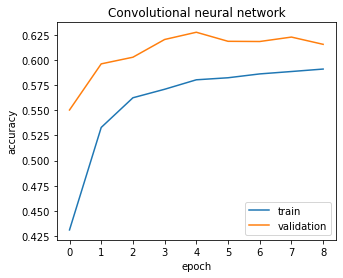

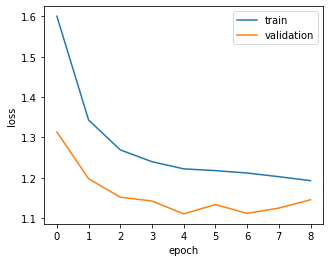

In [ ]:
# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Convolutional neural network')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# b)
del model

# INPUT -> CONV-32 -> RELU -> CONV-64 -> RELU -> POOL -> FC-128 -> FCS
#Create modelB
model = Sequential()
model.add(InputLayer(input_shape = input_shape)) #add the input layer with shape 32x32x3
model.add(Conv2D(32, #CONV-32
                 activation='relu', #relu activation function
                 input_shape=input_shape,
                 kernel_size=(3,3)))
model.add(Conv2D(64, #CONV-64
                 activation='relu', #RELU activation function
                 input_shape=input_shape,
                 kernel_size=(3,3)))
model.add(MaxPooling2D(padding='same')) #POOL
model.add(Flatten())
model.add(Dropout(0.5)) #dropout for FC-128
model.add(Dense(128)) #FC-128
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))



model.summary()

model.compile(optimizer="adam",
              metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

history = model.fit(X_train, y_train,
                    verbose = 1,
                    epochs=100,
                    callbacks = stopper, #stop when val stops improving
                    validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)
history_len = len(history.history["accuracy"])
if history_len < 100:
  print('Stopped at epochs %d since the validation accuracy stopped improving'
        %(history_len))


print('\n')
print('Train loss:', history.history['loss'][history_len-1])
print('Train accuracy:', history.history['accuracy'][history_len-1])
print('\n')
print('Validation loss:', history.history['val_loss'][history_len-1])
print('Validation accuracy:', history.history['val_accuracy'][history_len-1])
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12544)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

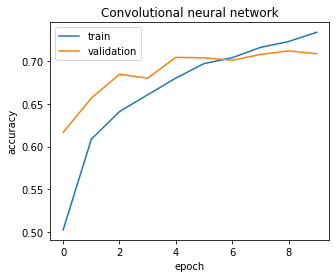

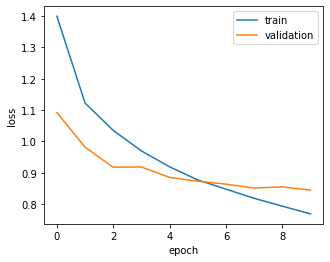

In [ ]:
# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Convolutional neural network')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# c) Insert your code here
# [CONV-32 -> RELU]*2 -> POOL -> [CONV-64 -> RELU]*2 -> POOL -> FC-512 -> RELU -> FCS (simplified VGGnet).
del model

#Create model C
model = Sequential()
model.add(Conv2D(32, #CONV-32
                 activation='relu', #relu activation function
                 input_shape=input_shape,
                 kernel_size=(3,3)))
model.add(Conv2D(32, #CONV-32
                 activation='relu', #relu activation function
                 input_shape=input_shape,
                 kernel_size=(3,3)))
model.add(MaxPooling2D(padding='same')) #POOL
model.add(Conv2D(64, #CONV-64
                 activation='relu', #RELU activation function
                 input_shape=input_shape,
                 kernel_size=(3,3)))
model.add(Conv2D(64, #CONV-64
                 activation='relu', #RELU activation function
                 input_shape=input_shape,
                 kernel_size=(3,3)))
model.add(MaxPooling2D(padding='same')) #POOL
model.add(Flatten())
model.add(Dropout(0.5)) #dropout for FC-128
model.add(Dense(512,activation='relu')) #FC-128
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))



model.summary()

model.compile(optimizer="adam",
              metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

history = model.fit(X_train, y_train,
                    verbose = 1,
                    epochs=100,
                    callbacks = stopper,#stop when val stops improving
                    validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)
history_len = len(history.history["accuracy"])
if history_len < 100:
  print('Stopped at epochs %d since the validation accuracy stopped improving'
        %(history_len))


print('\n')
print('Train loss:', history.history['loss'][history_len-1])
print('Train accuracy:', history.history['accuracy'][history_len-1])
print('\n')
print('Validation loss:', history.history['val_loss'][history_len-1])
print('Validation accuracy:', history.history['val_accuracy'][history_len-1])
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

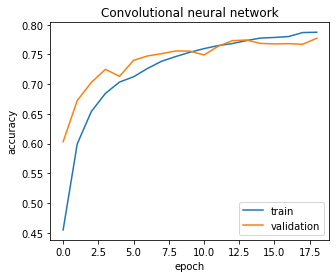

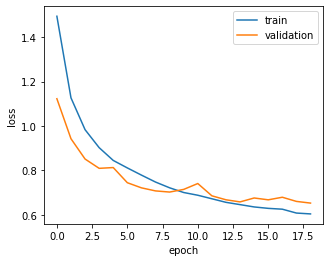

In [ ]:
# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Convolutional neural network')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# d)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# [CONV-32 -> RELU]*2 -> POOL -> [CONV-64 -> RELU]*2 -> POOL -> FC-512 -> RELU -> FCS (simplified VGGnet).
#Retrain the network from c) using data augmention. Use the ImageDataGenerator 
#class in Keras to generate new examples during training. Comment briefly on 
#the type of mistakes that your final network makes, e.g. by inspecting a 
#confusion matrix for the test set. How does your classifier compare to the 
#results listed here: https://benchmarks.ai/cifar-10 ?

#Create model C
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
          steps_per_epoch=len(X_train) / 32,
          verbose = 1,
                    epochs=100,
                    callbacks = stopper,
                    validation_data=(X_val,y_val))#stop when val stops improving)


score = model.evaluate(X_test, y_test, verbose=0)
history_len = len(history.history["accuracy"])
if history_len < 100:
  print('Stopped at epochs %d since the validation accuracy stopped improving'
        %(history_len))


print('\n')
print('Train loss:', history.history['loss'][history_len-1])
print('Train accuracy:', history.history['accuracy'][history_len-1])
print('\n')
print('Validation loss:', history.history['val_loss'][history_len-1])
print('Validation accuracy:', history.history['val_accuracy'][history_len-1])
print('\n')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
1406/1406 [==============================] - 22s 15ms/step - loss: 1.1095 - accuracy: 0.6152 - val_loss: 0.8163 - val_accuracy: 0.7242
Epoch 2/100
1406/1406 [==============================] - 22s 16ms/step - loss: 1.0464 - accuracy: 0.6365 - val_loss: 0.8695 - val_accuracy: 0.7016
Epoch 3/100
 139/1406 [=>............................] - ETA: 19s - loss: 1.0031 - accuracy: 0.6527

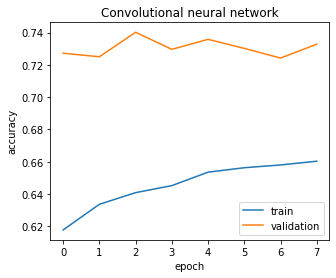

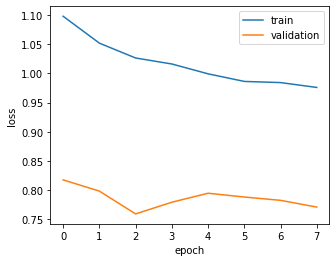

In [ ]:
# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Convolutional neural network')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

The main reason for so low accuracy is probably because these parameters do not connect well with the validation data. When shifting the training data. I want to try more parameters later